 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [32]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [33]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [34]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [35]:
# Drop nulls
whale_df_nulldrop = whale_df.dropna()
whale_df_nulldrop.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [36]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [37]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [38]:
# Drop nulls
algo_df_nulldrop = algo_df.dropna()
algo_df_nulldrop.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [39]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [40]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [41]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df["Close"]

<ipython-input-41-c72546483133>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [42]:
# Calculate Daily Returns
sp500_df_returns = sp500_df.pct_change()
sp500_df_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [43]:
# Drop nulls
sp500_df_returns_clean = sp500_df_returns.dropna()
sp500_df_returns_clean.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [44]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df_final = sp500_df_returns_clean.rename(columns={"Close": "SP500_Close"})
sp500_df_final.head()

,SP500_Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [45]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([whale_df_nulldrop, algo_df_nulldrop, sp500_df_final], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index()

# Set column names to 'FB' 'TWTR', 'SNAP', and 'S&P 500'
combined_df.columns = ["SOROS", "Paulson", "Tiger", "Buffett", "Algo 1", "Algo 2", "SP500_Close"]

# Display a few rows
combined_df.head()

,SOROS,Paulson,Tiger,Buffett,Algo 1,Algo 2,SP500_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

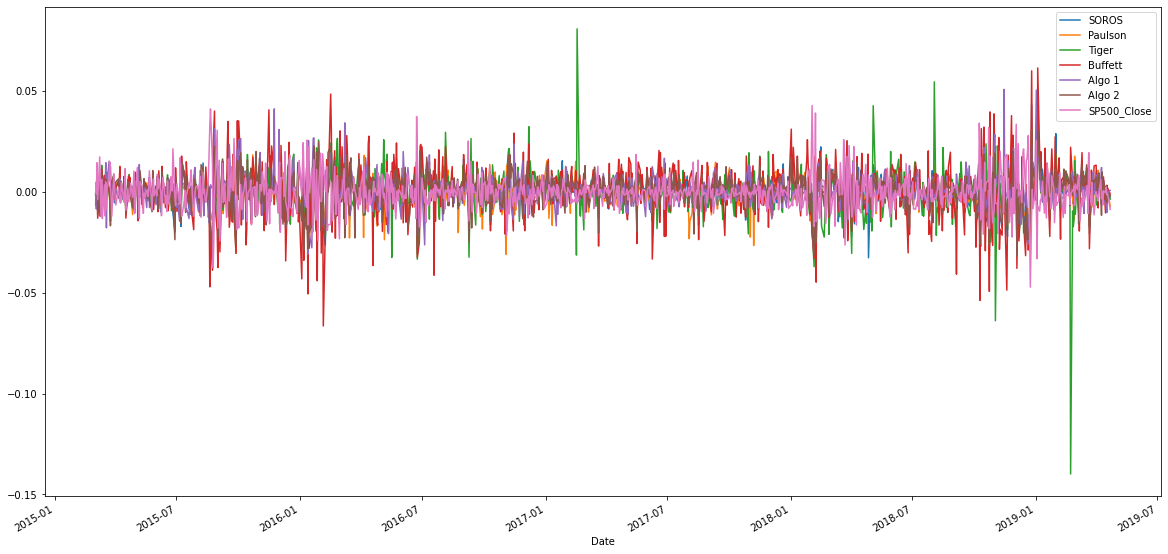

In [46]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

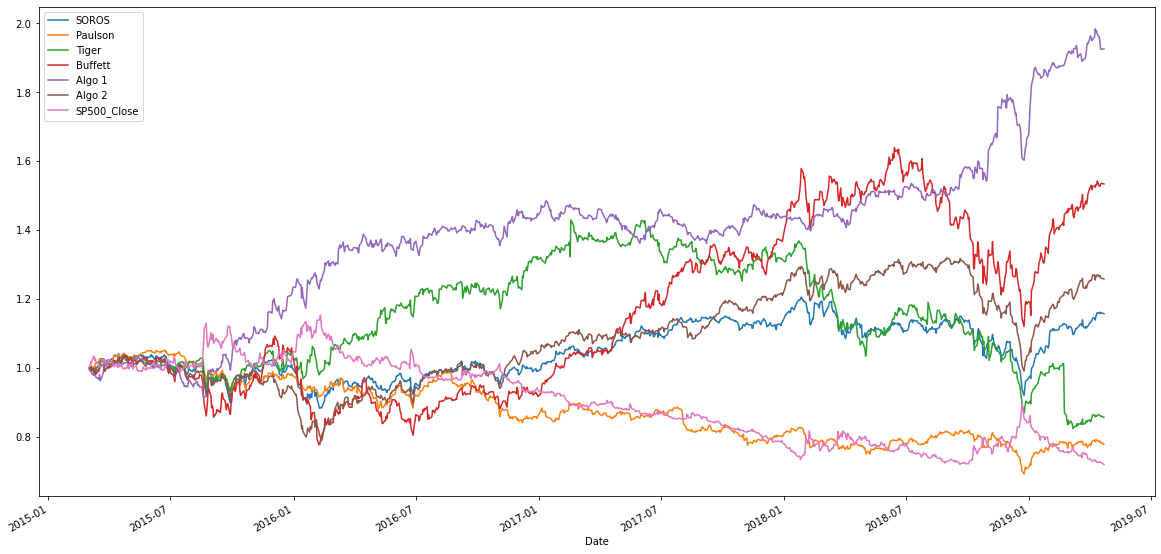

In [47]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(20,10))
# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

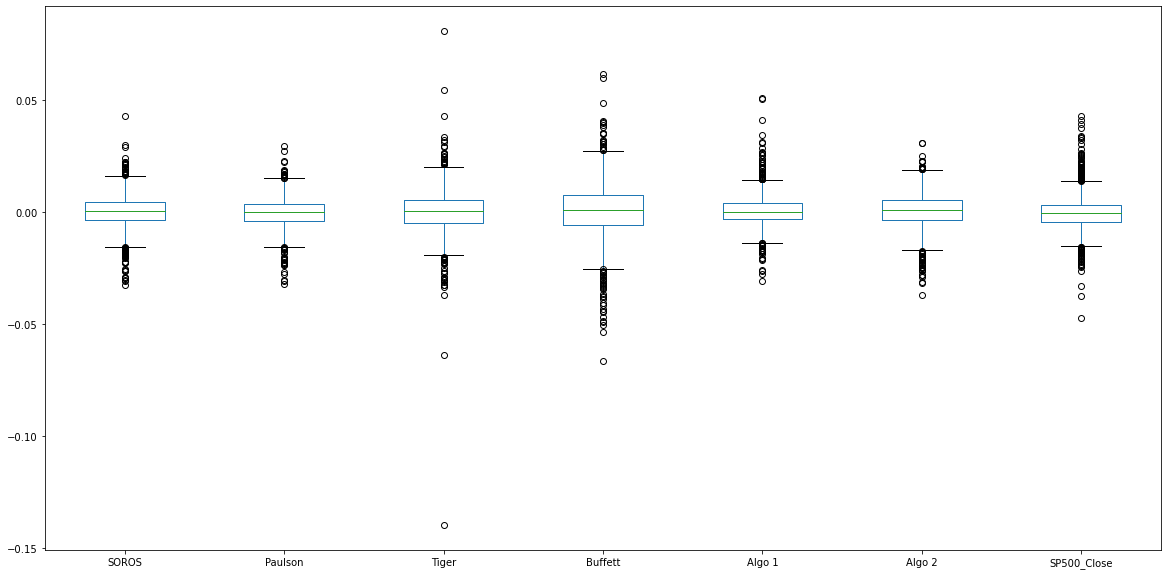

In [48]:
# Box plot to visually show risk
#whale_std = whale_df_nulldrop.std()
#algo_std = algo_df_nulldrop.std()
#sp500_std = sp500_df_final.std()

#combined_std = pd.DataFrame({
#    "Whale": whale_std,
#    "Algo": algo_std,
#    "SP500": sp500_std
#})

#combined_std.plot.box()
combined_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [49]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std

SOROS          0.007896
Paulson        0.007026
Tiger          0.010897
Buffett        0.012919
Algo 1         0.007623
Algo 2         0.008341
SP500_Close    0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std

SOROS          0.125348
Paulson        0.111527
Tiger          0.172989
Buffett        0.205079
Algo 1         0.121006
Algo 2         0.132413
SP500_Close    0.136313
dtype: float64

In [51]:
Buffett and Tiger are riskier than the S&P 500 as shown by the higher standard deviations.

SyntaxError: invalid syntax (<ipython-input-51-b41538e388a4>, line 1)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviations'}, xlabel='Date'>

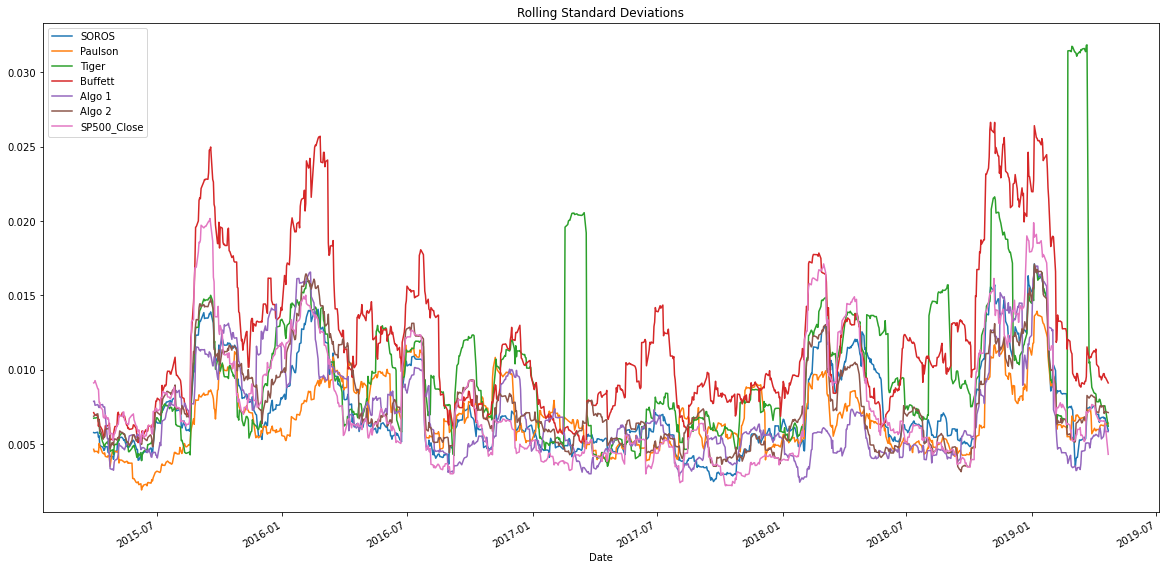

In [53]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_rolling_std.plot(figsize=(20,10), title="Rolling Standard Deviations")

### Calculate and plot the correlation

<AxesSubplot:>

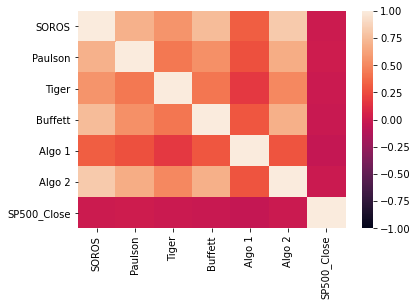

In [54]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [55]:
# Calculate covariance of a single portfolio
soros_covariance = combined_df['SOROS'].cov(combined_df['SP500_Close'])
# Calculate variance of S&P 500
variance = combined_df['SP500_Close'].var()
# Computing beta
soros_beta = soros_covariance / variance
# Plot beta trend
soros_beta


0.0005275302230852882

In [56]:
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_soros = combined_df['SOROS'].rolling(window=30).cov(combined_df['SP500_Close'])
rolling_paulson = combined_df['Paulson'].rolling(window=30).cov(combined_df['SP500_Close'])
rolling_tiger = combined_df['Tiger'].rolling(window=30).cov(combined_df['SP500_Close'])
rolling_buffett = combined_df['Buffett'].rolling(window=30).cov(combined_df['SP500_Close'])
rolling_algo1 = combined_df['Algo 1'].rolling(window=30).cov(combined_df['SP500_Close'])
rolling_algo2 = combined_df['Algo 2'].rolling(window=30).cov(combined_df['SP500_Close'])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = combined_df['SP500_Close'].rolling(window=30).var()

# Calculate 30-day rolling beta of AMZN and plot the data
rolling_soros_beta = rolling_soros / rolling_variance
rolling_paulson_beta = rolling_paulson / rolling_variance
rolling_tiger_beta = rolling_tiger / rolling_variance
rolling_buffett_beta = rolling_buffett / rolling_variance
rolling_algo1_beta = rolling_algo1 / rolling_variance
rolling_algo2_beta = rolling_algo2 / rolling_variance
rolling_buffett_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.181595
2019-04-16    0.144790
2019-04-17    0.162776
2019-04-18    0.243490
2019-04-22    0.188760
Length: 1042, dtype: float64

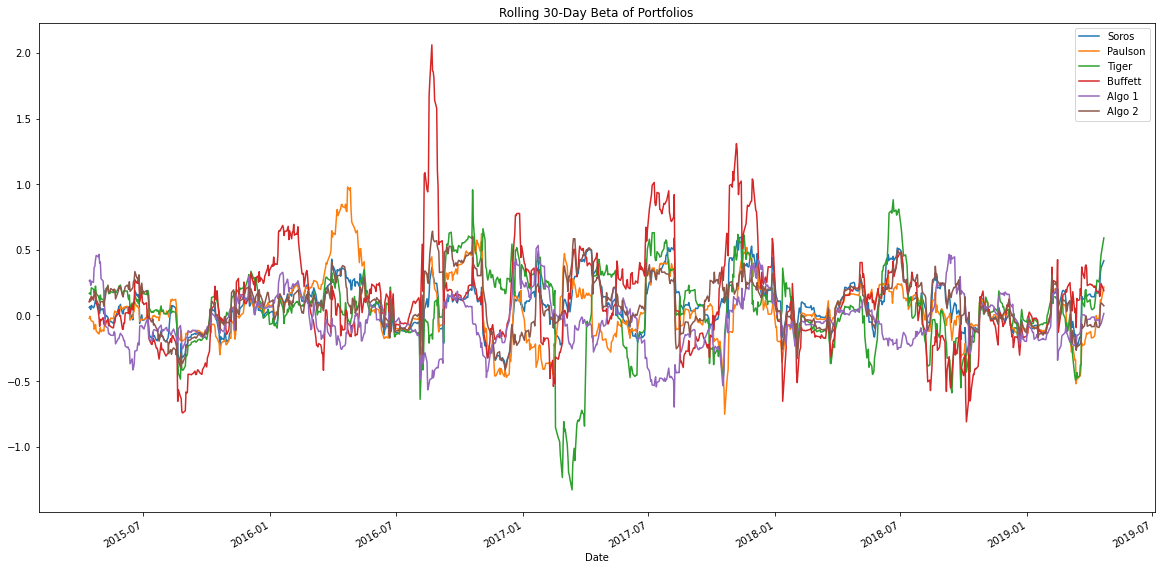

In [57]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_soros_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Portfolios')
rolling_paulson_beta.plot(ax=ax)
rolling_tiger_beta.plot(ax=ax)
rolling_buffett_beta.plot(ax=ax)
rolling_algo1_beta.plot(ax=ax)
rolling_algo2_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Soros", "Paulson", "Tiger", "Buffett", "Algo 1", "Algo 2"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'21 Day Exponential Moving Averages'}, xlabel='Date'>

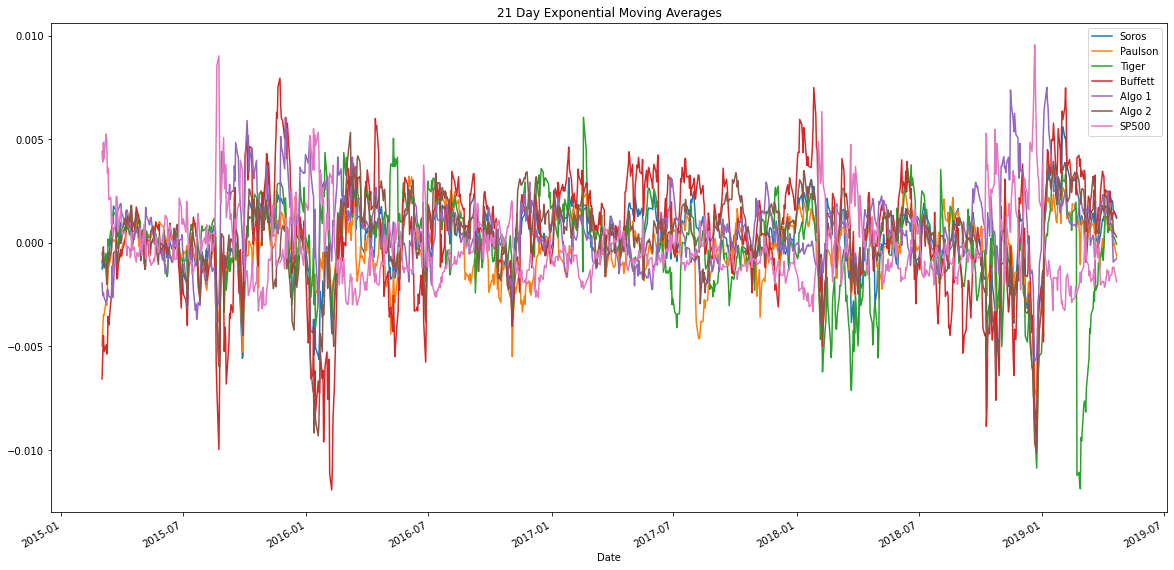

In [58]:
# Use `ewm` to calculate the rolling window
soros_ewm = combined_df['SOROS'].ewm(span=21, adjust=False).mean()
paulson_ewm = combined_df['Paulson'].ewm(span=21, adjust=False).mean()
tiger_ewm = combined_df['Tiger'].ewm(span=21, adjust=False).mean()
buffett_ewm = combined_df['Buffett'].ewm(span=21, adjust=False).mean()
algo1_ewm = combined_df['Algo 1'].ewm(span=21, adjust=False).mean()
algo2_ewm = combined_df['Algo 2'].ewm(span=21, adjust=False).mean()
sp500_ewm = combined_df['SP500_Close'].ewm(span=21, adjust=False).mean()

combined_ewm = pd.DataFrame({
    "Soros": soros_ewm,
    "Paulson": paulson_ewm,
    "Tiger": tiger_ewm,
    "Buffett": buffett_ewm,
    "Algo 1": algo1_ewm,
    "Algo 2": algo2_ewm,
    "SP500": sp500_ewm
})

combined_ewm.plot(figsize=(20,10), title="21 Day Exponential Moving Averages")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [59]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_df.mean()-combined_df['SP500_Close'].mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS          0.906838
Paulson        0.142411
Tiger          0.278448
Buffett        0.951436
Algo 1         1.953767
Algo 2         1.018189
SP500_Close    0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

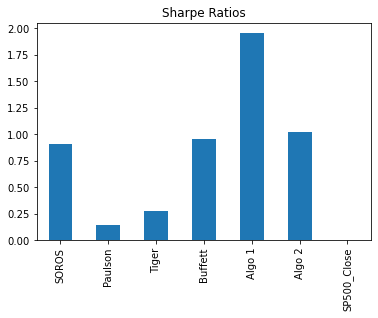

In [60]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [ ]:
In terms of the Sharpe ratios and the cumulative returns, the Algo 1 strategy is the clear winner in performance.  Algo 2 is pretty decent in
performance as well with a fairly high Sharpe ratio but quite middling in the cumulative returns.  The only question is how long will the situation
last.  As far as the moment is concerned, I think going with Algo 1 with lesser risk and higher potential for returns.

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [61]:
# Reading data from 1st stock
GOOG_data = Path("Resources/goog_historical.csv")
GOOG_df = pd.read_csv(GOOG_data, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
GOOG_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [62]:
# Reading data from 2nd stock
AAPL_data = Path("Resources/aapl_historical.csv")
AAPL_df = pd.read_csv(AAPL_data, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
AAPL_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [63]:
# Reading data from 3rd stock
COST_data = Path("Resources/cost_historical.csv")
COST_df = pd.read_csv(COST_data, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
COST_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [64]:
SPX_data = Path("Resources/SP500.csv")
SPX_df = pd.read_csv(SPX_data, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
SPX_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,SPX,2727.72
2018-05-14,SPX,2730.13
2018-05-15,SPX,2711.45
2018-05-16,SPX,2722.46
2018-05-17,SPX,2720.13


In [65]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([GOOG_df, AAPL_df, COST_df, SPX_df], axis="columns", join="inner")
combined_stocks_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,,,
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34,SPX,2879.42
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18,SPX,2884.05
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23,SPX,2932.47
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62,SPX,2945.64
2019-05-02,GOOG,1162.61,AAPL,209.15,COST,242.69,SPX,2917.52


In [66]:
# Reset Date index
combined_stocks_df.sort_index(inplace=True)
combined_stocks_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76,SPX,2727.72
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88,SPX,2730.13
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48,SPX,2711.45
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71,SPX,2722.46
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60,SPX,2720.13


In [67]:
# Reorganize portfolio data by having a column per symbol
combined_rows_df = pd.concat([GOOG_df, AAPL_df, COST_df, SPX_df], axis="rows", join="inner")
combined_rows_df = combined_rows_df.reset_index()
combined_rows_df = combined_rows_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
combined_rows_df.head()

Symbol,AAPL,COST,GOOG,SPX
Trade DATE,,,,
2018-05-11,188.59,195.76,1098.26,2727.72
2018-05-14,188.15,195.88,1100.20,2730.13
2018-05-15,186.44,195.48,1079.23,2711.45
2018-05-16,188.18,198.71,1081.77,2722.46
2018-05-17,186.99,199.60,1078.59,2720.13


In [68]:
# Calculate daily returns
combined_returns = combined_rows_df.pct_change()
# Drop NAs
combined_returns_clean = combined_returns.dropna()
# Display sample data
combined_returns_clean.head()

Symbol,AAPL,COST,GOOG,SPX
Trade DATE,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000884
2018-05-15,-0.009088,-0.002042,-0.019060,-0.006842
2018-05-16,0.009333,0.016523,0.002354,0.004061
2018-05-17,-0.006324,0.004479,-0.002940,-0.000856
2018-05-18,-0.003637,-0.003206,-0.011339,-0.002632


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [69]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return
portfolio_returns = combined_returns_clean.dot(weights)
# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000232
2018-05-15   -0.009258
2018-05-16    0.008068
2018-05-17   -0.001410
2018-05-18   -0.005204
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [71]:
# Join your returns DataFrame to the original returns DataFrame
combined_dataframe = pd.DataFrame({"AAPL": combined_returns_clean["AAPL"],
    "COST": combined_returns_clean["COST"],
    "GOOG": combined_returns_clean["GOOG"],
    "SPX": combined_returns_clean["SPX"],                               
    "Returns": portfolio_returns})

combined_dataframe.head()

,AAPL,COST,GOOG,SPX,Returns
Trade DATE,,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000884,0.000232
2018-05-15,-0.009088,-0.002042,-0.019060,-0.006842,-0.009258
2018-05-16,0.009333,0.016523,0.002354,0.004061,0.008068
2018-05-17,-0.006324,0.004479,-0.002940,-0.000856,-0.001410
2018-05-18,-0.003637,-0.003206,-0.011339,-0.002632,-0.005204


In [72]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_dataframe.dropna()

,AAPL,COST,GOOG,SPX,Returns
Trade DATE,,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000884,0.000232
2018-05-15,-0.009088,-0.002042,-0.019060,-0.006842,-0.009258
2018-05-16,0.009333,0.016523,0.002354,0.004061,0.008068
2018-05-17,-0.006324,0.004479,-0.002940,-0.000856,-0.001410
2018-05-18,-0.003637,-0.003206,-0.011339,-0.002632,-0.005204
...,...,...,...,...,...
2019-05-03,0.012431,0.007953,0.019602,0.009638,0.012406
2019-05-06,-0.015443,-0.001594,0.003366,-0.004471,-0.004536
2019-05-07,-0.026957,-0.016583,-0.012855,-0.016512,-0.018227


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [73]:
# Calculate the annualized `std`
combined_returns_std = combined_returns_clean.std()
combined_annualized_std = combined_returns_std * np.sqrt(252)
combined_annualized_std

Symbol
AAPL    0.296955
COST    0.209320
GOOG    0.263554
SPX     0.149999
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviations'}, xlabel='Trade DATE'>

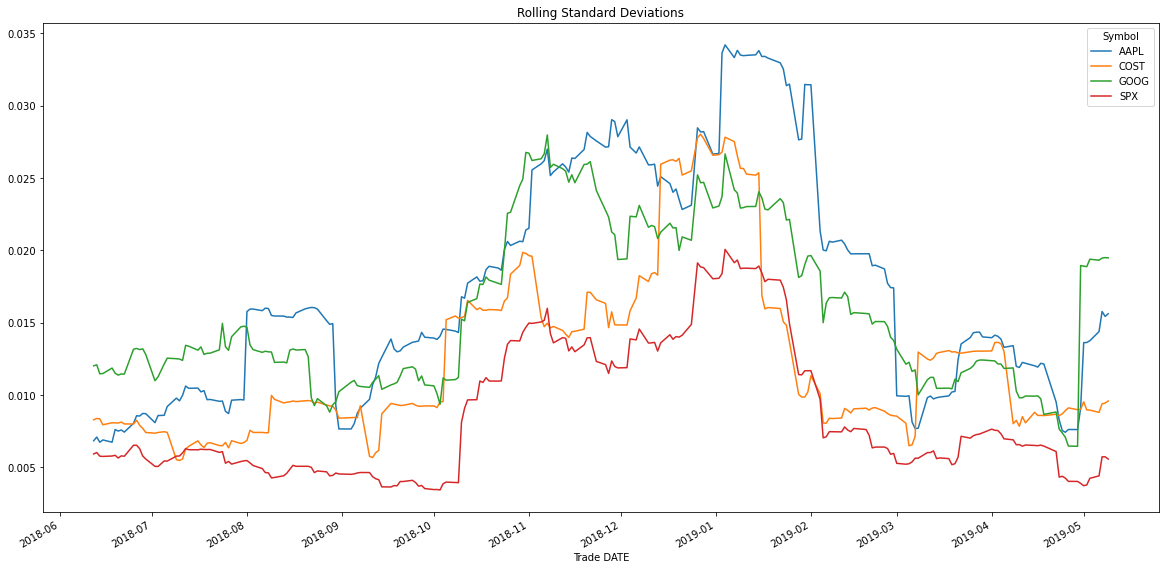

In [74]:
# Calculate rolling standard deviation
combined_returns_clean.rolling(window=21).std().plot(figsize=(20,10), title="Rolling Standard Deviations")
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:xlabel='Symbol', ylabel='Symbol'>

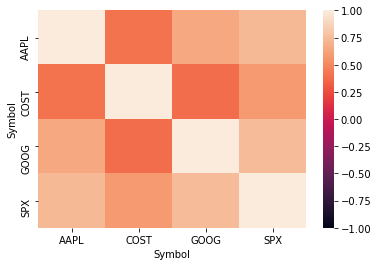

In [75]:
# Calculate and plot the correlation
combined_correlation = combined_returns_clean.corr()
sns.heatmap(combined_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [76]:
# Calculate and plot Beta
# Calculate 60-day rolling covariance of Stocks vs. S&P 500 and plot the data
rolling_aapl_covariance = combined_returns_clean['AAPL'].rolling(window=60).cov(combined_returns_clean['SPX'])
rolling_goog_covariance = combined_returns_clean['GOOG'].rolling(window=60).cov(combined_returns_clean['SPX'])
rolling_cost_covariance = combined_returns_clean['COST'].rolling(window=60).cov(combined_returns_clean['SPX'])
rolling_returns_covariance = combined_dataframe['Returns'].rolling(window=60).cov(combined_returns_clean['SPX'])


# Calculate 60-day rolling variance of S&P 500
rolling_variance = combined_returns_clean['SPX'].rolling(window=60).var()

# Calculate 30-day rolling beta of AMZN and plot the data
rolling_aapl_beta = rolling_aapl_covariance / rolling_variance
rolling_goog_beta = rolling_goog_covariance / rolling_variance
rolling_cost_beta = rolling_cost_covariance / rolling_variance
rolling_returns_beta = rolling_returns_covariance / rolling_variance
rolling_returns_beta

Trade DATE
2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-05-03    0.926886
2019-05-06    0.897248
2019-05-07    0.931123
2019-05-08    0.931195
2019-05-09    0.919274
Length: 249, dtype: float64

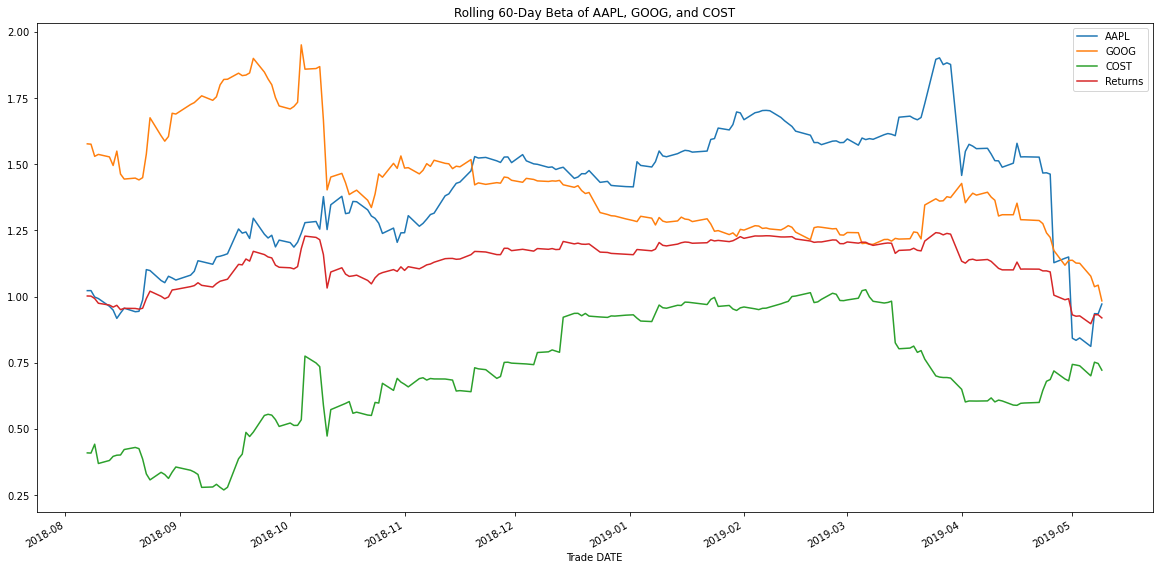

In [77]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_aapl_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of AAPL, GOOG, and COST')
rolling_goog_beta.plot(ax=ax)
rolling_cost_beta.plot(ax=ax)
rolling_returns_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["AAPL", "GOOG", "COST","Returns"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_2 = ((combined_returns_clean.mean()-combined_returns_clean['SPX'].mean()) * 252) / (combined_returns_clean.std() * np.sqrt(252))
sharpe_ratios_2

Symbol
AAPL    0.139090
COST    0.845232
GOOG    0.099279
SPX     0.000000
dtype: float64

In [78]:
sharpe_ratios_3 = ((combined_dataframe['Returns'].mean()-combined_returns_clean['SPX'].mean()) * 252) / (combined_returns_clean.std() * np.sqrt(252))
sharpe_ratios_3

Symbol
AAPL    0.205749
COST    0.291889
GOOG    0.231824
SPX     0.407324
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for stocks'}, xlabel='Symbol'>

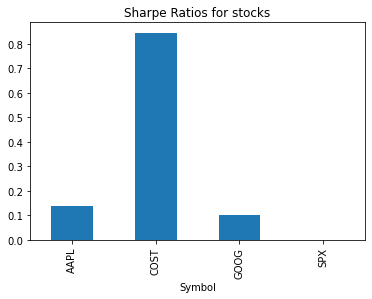

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind="bar", title="Sharpe Ratios for stocks")

<AxesSubplot:title={'center':'Sharpe Ratios for stocks with returns'}, xlabel='Symbol'>

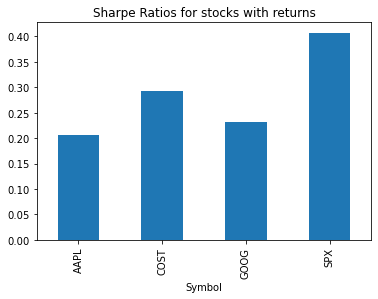

In [80]:
sharpe_ratios_3.plot(kind="bar", title="Sharpe Ratios for stocks with returns")

### How does your portfolio do?

Write your answer here!

In [ ]:
While the Sharpe ratio assumes that the returns are evenly distributed, the higher sharpe ratio is generally better.  COST is a better long term hold
and a better stock to hold for the portfolio because the standard deviations are less the AAPL or GOOG and the correlation to the SPX is lower as well.
COST is a good stock to hold for a diversified portfolio.

If you combine all the returns, SPX looks the best in terms of Sharpe ratios.  With the index you are diversified pretty well anyways.  I would want
SPX to have the portfolio perfectly diversified.